# **빅데이터개론 5주차 실습 - 데이터 시각화**

- - -

https://mode.com/blog/r-data-visualization-packages/


## **1. base R plot**

- - -

* plot() - base R

기본적으로 plot() 함수는 주어진 데이터를 시각화하는데 모두 사용할 수 있는 일반적인 함수(base R)

```
plot(x, y) or plot(y ~ x)

x ==> x 축
y ==> y 축                                                    

```

In [ ]:
# vector를 이용한 plot
a <- 1:10
b <- 1:10

plot(x = a, y = b)

In [ ]:
plot(b ~ a)

In [ ]:
# x축 y축을 설정하지 않는다면, default로 y축에 해당 값이 설정. x축은 y값의 index
plot(a)

In [ ]:
library(tidyverse)
sample(1:100, 10, replace = F) %>% plot()

In [ ]:
# dataframe을 이용한 plot
install.packages("data.table")
library(data.table)
library(tidyverse)

DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

In [ ]:
DF %>% show()

In [ ]:
DF %>% str()

In [ ]:
# https://dacon.io/competitions/official/235546/data/
# G(출전게임수), avg(타율), R(득점), SO(삼진아웃)

plot(x = DF$G, y = DF$avg)

In [ ]:
# R(득점)
plot(DF$avg ~ DF$R) 

In [ ]:
# 그래프 여러개, 대각선을 기준으로 수평 -> Y축, 수직 -> X축
DF[ , 5:9] %>% plot()

In [ ]:
# select_if, 숫자형 열 전체
DF %>% select_if(is.numeric) %>% plot()

* **plot()의 주요 옵션**
```
xlab, ylab              x,y축 이름
main                    그래프 제목
pch(plotting character) 점의 종류
cex(character size)     점의 크기
col                     색상
xlim,ylim               x,y축의 값 범위
type                    그래프 유형
```


In [ ]:
# 연도별 팀 평균 타율
team_year_avg <- DF %>% group_by(team, year) %>% summarise(avg_AVG = mean(avg, na.rm = T)) %>%
                      filter(team == "KIA" | team == "SK" | team == "삼성")
team_year_avg %>% show()

In [ ]:
team_year_avg

* default

In [ ]:
# 기본 plot
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG)

* plot type

```
“p”: Points

“l”: Lines

“b”: Both

“c”: The lines part alone of “b”

“o”: Both “overplotted”

“h”: Histogram like (or high-density) vertical lines

“n”: No plotting
```


In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type ="p")

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type ="l")

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type ="b")

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type ="c")

In [ ]:
# type "n"의 상태에서 point함수로 채움
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type ="n")

* point, main, xlab, ylab

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

In [ ]:
# main, xlab, ylab
# x 축, y축 이름 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

# point를 이용한 그래프 추가
samsung <- team_year_avg %>% filter(team == "삼성")
points(x = samsung$year, y = samsung$avg_AVG)

In [ ]:
# main, xlab, ylab
# x 축, y축 이름 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

# point를 이용한 그래프 추가
samsung <- team_year_avg %>% filter(team == "삼성")
points(x = samsung$year, y = samsung$avg_AVG)

sk <- team_year_avg %>% filter(team == "SK")
points(x = sk$year, y = sk$avg_AVG)

In [ ]:
# main, xlab, ylab
# x 축, y축 이름 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

# point를 이용한 그래프 추가
samsung <- team_year_avg %>% filter(team == "삼성")
points(x = samsung$year, y = samsung$avg_AVG)

sk <- team_year_avg %>% filter(team == "SK")
points(x = sk$year, y = sk$avg_AVG)

kia <- team_year_avg %>% filter(team == "KIA")
points(x = kia$year, y = kia$avg_AVG)

* col

http://sape.inf.usi.ch/quick-reference/ggplot2/colour

In [ ]:
# 출력 그래프 크기 변경
library(repr)
options(repr.plot.width=15, repr.plot.height=10)

In [ ]:
# col
# team 별 색상 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year",xlab = "YEAR", ylab = "AVG")

points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2")
points(x = sk$year, y = sk$avg_AVG, col = "gold4")
points(x = kia$year, y = kia$avg_AVG, col = "grey32")

* pch

![대체 텍스트](https://www.statmethods.net/advgraphs/images/points.png)

In [ ]:
# pch
# 점의 모양 변경

plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4)

* cex

In [ ]:
# cex
# 점의 크기 변경
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 2.5)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 2.5)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 2.5)

* legend

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")
points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 2)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 2)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 2)

legend("topleft", legend = c("삼성","SK","KIA"))
# "bottomright"," bottom","bottomleft","left","topleft","top","topright","right","center"

In [ ]:
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")
points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 2)
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 2)
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 2)

legend("bottomright", legend = c("삼성","SK","KIA"), pch = c(8,11,4), col = c("maroon2", "gold4", "grey32"), cex = 1.5)

In [ ]:
# point와 line 함수
plot(x = team_year_avg$year, y = team_year_avg$avg_AVG, type = "n", main = "Team batting average by Year", xlab = "YEAR", ylab = "AVG")

# 삼성
points(x = samsung$year, y = samsung$avg_AVG, col = "maroon2", pch = 8, cex = 1)
lines(x = samsung$year, y = samsung$avg_AVG, col = "maroon2")

# SK
points(x = sk$year, y = sk$avg_AVG, col = "gold4", pch = 11, cex = 1)
lines(x = sk$year, y = sk$avg_AVG, col = "gold4")

# KIA
points(x = kia$year, y = kia$avg_AVG, col = "grey32", pch = 4, cex = 1)
lines(x = kia$year, y = kia$avg_AVG, col = "grey32")

legend("bottomright", legend = c("삼성","SK","KIA"), pch = c(8,11,4), col = c("maroon2", "gold4", "grey32"), cex = 1.5)

## **2. ggplot2**


https://ggplot2.tidyverse.org/reference/

https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

https://www.r-graph-gallery.com/

- - -

```
Grammar of Graphics
일단 ggplot2의 철학(?)을 알아야 한다.

gg는 grammar of graphics의 약자다. 

그리고 이 문법은 다음과 같은 요소를 갖고 있다.

data : 시각화하려는 데이터 또는 실제 정보를 의미한다.
geometries : (줄여서 ‘geoms‘로 쓰기도 하는데) 데이터를 표현하는 도형을 의미한다. 산점도의 점, 그래프의 막대나 선 등. 데이터를 “매핑”하는 모양이라 할 수 있다.
aesthetics : 축의 스케일, 색상, 채우기 등 미학적/시각적 속성을 의미한다.
이 세 가지 요소 외에도 layer의 개념을 기억하면 좋다. ggplot2는 빈 캔버스에 geoms을 추가하고, 다른 요소들을 레이어로 얹어서 플롯을 완성하는 방식이기 때문에.

출처 : http://hleecaster.com/r-ggplot2-data-visualization/
출처 : http://stulp.gmw.rug.nl/21-03-2019/ggplotworkshop/ggplottheory.html
```



```
<Required>
ggplot(data = <데이터프레임>, aes(x = x축, y축)) + 
 geom_*  (point, bar, line, histogram, boxplot ...)

```

```
<aes(aesthetic)>
  1) x: X축 

  2) y: Y축

  3) color: 그래프의 색깔, 모양일 경우 테두리

  4) fill: 채우는 색깔

  5) size: 라이읜 굵기 또는 점의 크기

  6) alpha: 투명도 

  7) linetype: 선 패턴

  8) labels: 표나 축의 텍스트

  출처 : https://tariat.tistory.com/669
```


<center><img src="https://mblogthumb-phinf.pstatic.net/MjAxNzEwMjVfMjE5/MDAxNTA4ODg4MjY2MTk0.BZoMvCbkuMbw_Ywmi1fAyjonED-3tGQpat76O03diZYg.Al1ZXP7FEtexxtMHfKuJb2Gb_ZKPdWB69k_eHm-HBGkg.PNG.definitice/image.png?type=w800" width="500" height="300"></center>


In [ ]:
ggplot()

In [ ]:
ggplot(DF, aes(x = G, y = R))

#### **A. geom_point()** 

---

https://ggplot2.tidyverse.org/reference/geom_point.html



In [ ]:
# geom_point()
# https://ggplot2.tidyverse.org/reference/geom_point.html
# AB(타수), R(득점수)
ggplot(DF, aes(x = AB, y = R)) + 
 geom_point()

In [ ]:
# geom_point()
# aes(color, alpha)
ggplot(data = DF, aes(x = AB, y = R, color = team)) +
 geom_point()

In [ ]:
# geom_point()
# aes(color)
ggplot(data = DF, aes(x = AB, y = R, color = team)) +
 geom_point(alpha = 2/10, size = 5)

In [ ]:
# geom_point()
# aes(size)
ggplot(data = DF, aes(x = AB, y = R, color = team, size = R)) +
 geom_point(alpha = 4/10)

#### **B. geom_bar()**

---

https://ggplot2.tidyverse.org/reference/geom_bar.html

https://m.blog.naver.com/PostView.nhn?blogId=coder1252&logNo=220931268317&proxyReferer=https:%2F%2Fwww.google.com%2F

In [ ]:
# team별 R(득점수)와 H(안타수)의 합
team_R_H_sum <- DF %>% group_by(team) %>% 
 summarise(R_SUM = sum(R, na.rm = T), H_SUM = sum(H, na.rm = T))
team_R_H_sum %>% show()

In [ ]:
# stat = count, identity
ggplot(team_R_H_sum, aes(x = team)) + geom_bar(stat = "count")

In [ ]:
ggplot(team_R_H_sum, aes(x = team, y = R_SUM)) + geom_bar(stat = "identity")

In [ ]:
ggplot(team_R_H_sum, aes(x = team, y = R_SUM)) + geom_bar() # stat = "count"

In [ ]:
# color
ggplot(team_R_H_sum, aes(x = team, y = R_SUM)) + 
 geom_bar(stat = "identity", aes(color = team))

In [ ]:
# fill
ggplot(team_R_H_sum, aes(x = team, y = R_SUM)) +
 geom_bar(stat = "identity", aes(fill = team))

In [ ]:
# reorder
ggplot(team_R_H_sum, aes(x = team, y = R_SUM)) + 
 geom_bar(stat = "identity", aes(reorder(team, R_SUM), fill = team))

In [ ]:
# reorder
ggplot(team_R_H_sum, aes(x = team, y = R_SUM)) + 
 geom_bar(stat = "identity", aes(reorder(team, -R_SUM), fill = team))

In [ ]:
# coord_flip()
ggplot(team_R_H_sum, aes(x = team, y = R_SUM)) +
 geom_bar(stat = "identity", aes(reorder(team, -R_SUM), fill = team)) +
 coord_flip()

#### **C. geom_histogram(), geom_boxplot()**

---
https://ggplot2.tidyverse.org/reference/geom_histogram.html

https://ggplot2.tidyverse.org/reference/geom_boxplot.html

In [ ]:
DF %>% ggplot(aes(H)) +
  geom_histogram()

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, color = team)) +
  geom_histogram()

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram()

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(bins = 12)

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(bins = 1)

In [ ]:
# scale_xy_continuous
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(bins = 12) +
 scale_x_continuous(breaks = seq(0, 220, 10)) + 
 scale_y_continuous(breaks = seq(0, 800, 20))

In [ ]:
# position = "dodge"
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(position = "dodge") +
 scale_x_continuous(breaks = seq(0, 220, 10)) + 
 scale_y_continuous(breaks = seq(0, 800, 20))

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R)) +
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot")

#### **D. extrafont, theme를 이용해서한글을 제대로 출력해보자!!!!**

---

https://ggplot2.tidyverse.org/reference/theme.html

In [ ]:
# google colab(Ubuntu) 만 해당(Window, Mac 유저는 이 부분 실행하면 오류 발생, 배달의 민족 폰트 : https://www.woowahan.com/#/fonts)
system("sudo apt-get install fonts-nanum-coding")
#/usr/share/fonts/truetpye/nanum"

In [ ]:
install.packages("extrafont")
library(extrafont)

In [ ]:
options(warn = -1)
font_import(pattern = "Nanum")  # 또는 font_import() 전체.. 시간 오래걸림

fonts() # 해당 셀 완료후, 메뉴 - 런타임 - 런타임 재시작

In [ ]:
fonts()[1]

In [ ]:
library(tidyverse)
library(data.table)
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

In [ ]:
# geom_boxplot
# http://blog.naver.com/nife0719/221000580841
DF %>% ggplot(aes(x = team, y = R)) +
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 15,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 15,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

In [ ]:
# geom_boxplot
# http://blog.naver.com/nife0719/221000580841
DF %>% ggplot(aes(x = team, y = R, fill = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 15,face = "bold", color = "red"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold", color = "blue"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

In [ ]:
# geom_boxplot
# http://blog.naver.com/nife0719/221000580841
DF %>% ggplot(aes(x = team, y = R, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 15,face = "bold", color = "red"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold", color = "blue"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

#### **E. RColorBrewer, scale_fill_brewer, scale_color_brewer**

---

https://ggplot2.tidyverse.org/reference/scale_brewer.html


In [ ]:
library(RColorBrewer)
RColorBrewer::display.brewer.all()

In [ ]:
RColorBrewer::brewer.pal.info %>% show()

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))+
  scale_color_brewer(palette = "PuOr")

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, fill = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, fill = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))+
  scale_fill_brewer(palette = "PuOr")

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, fill = team, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))+
  scale_fill_brewer(palette = "PuOr")

# **<5주차 과제 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata Lab 5.ipynb 파일을 SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2020.9.28(월요일) ~ 2020.10.11(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**


- - -


## 1. base R의 여러 plot 함수 사용 - ``pie, barplot, hist`` (60점)

**<사용되는 데이터 - Regular_Season_Batter.csv>**

Base R의 ``pie(), barplot(), hist()``를 사용해보자. 

Regular_Season_Batter에서 ``적절한 열(column)을 선택``하여 조건을 만족하는 ``pie(), barplot(), hist() 그래프를 각각 그리자(그래프당 20점) ``

```
<조건>
1. 사용되는 열(column)은 그리고자 하는 그래프 특성에 맞추어서 선택할 것. 
2. 반드시 ggplot2가 아닌 baseR의 함수로 진행할 것. 
3. 옵션(option)은 그래프 제목(main), x/y축 이름(xlab, ylab)은 반드시 포함해야 함. 그 외의 옵션은 자유롭게 설정할 것. 
4. 각각의 그래프에는 간략한 설명 (2~3 줄)을 포함할 것. 
```


In [ ]:
# 데이터
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

In [ ]:
## 답안 작성
#


## 2. 특정 선수의 연도별 그래프(ggplot2 이용) (40점)

**<사용되는 데이터 - Regular_Season_Batter.csv >**

Regular_Season_Batter.csv에서 ``특정 선수를 선택``하고, 

``H(안타 개수)``, ``HR(홈런 개수)``, ``R(득점 개수)``를 ``연도별``로 그래프를 그려보자 

```
<참고사항> 

특정 선수는 자유롭게 한 명을 선택할 것. 
반드시 ggplot2으로 진행하고 아래의 조건을 만족할 것. 

<조건> 
1. 반드시 사용되는 열(column)인 batter_name(특정 선수 1명), year와 H, HR, R열로 진행
2. ggtitle를 이용해서 그래프의 제목을 설정할 것.
3. extrafont를 이용해서 한글이 깨지는 것을 방지할 것
4. scale_color_brewer 또는 scale_fill_brewer 적용(RColorBrewer 사용) 
5. facet_wrap 적용 
6. 그래프에는 간략한 설명 (2~3 줄)을 포함할 것. 
```

* 예시

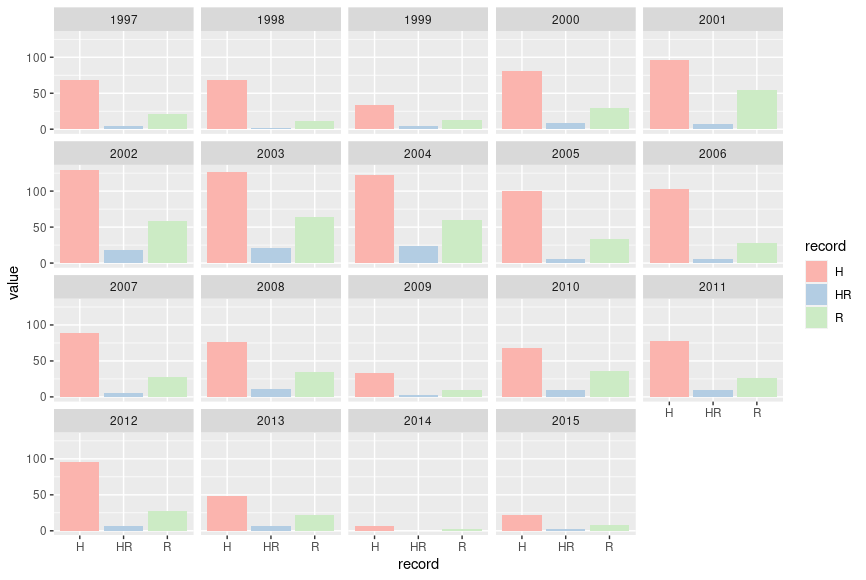



In [ ]:
# 데이터
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

In [ ]:
## 답안 작성
#
